### Visualisation de relations continues

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("source/sales_predictions.csv")

In [7]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


On peut déjà constater qu'on a beaucoup de données avec ces 2,9 millions de lignes.\
C'est un ordre de grandeur qui peut potentiellement allonger le temps de traitement de ces données et particulièrement leur visualisation graphique.

In [8]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


#### Visualisation des prix en fonction des dates

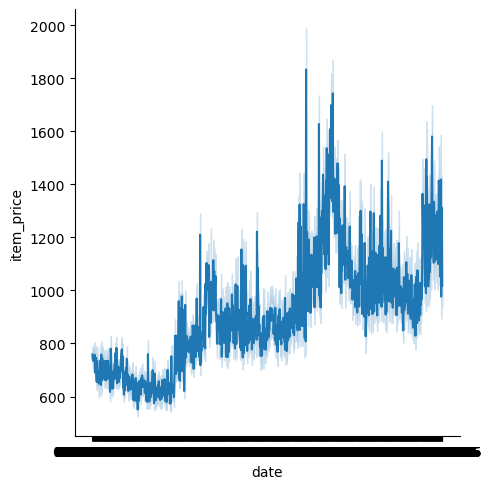

In [9]:
g = sns.relplot(x="date", y="item_price", data=df, kind="line")
plt.show()

##### Problème

- Beaucoup trop de données à visualiser
- Tout est illisible

#### Échantillonage

On va créer un échantillon de ces grosses données afin de pouvoir les visualiser.

On utilise la fonction _sample_ de pandas, qui n'est rien d'autre qu'une fonction ressemblant à la librairie _random_.

In [10]:
df2 = df.sample(n=50)

In [11]:
df2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
651114,28.07.2013,6,35,11867,0.1,2.0
329095,30.03.2013,2,25,16452,549.0,-1.0
1791935,18.07.2014,18,37,11922,549.0,1.0
2430882,19.02.2015,25,57,8664,149.0,1.0
1227812,01.12.2013,11,57,8829,69.0,1.0


#### Visualisation graphique

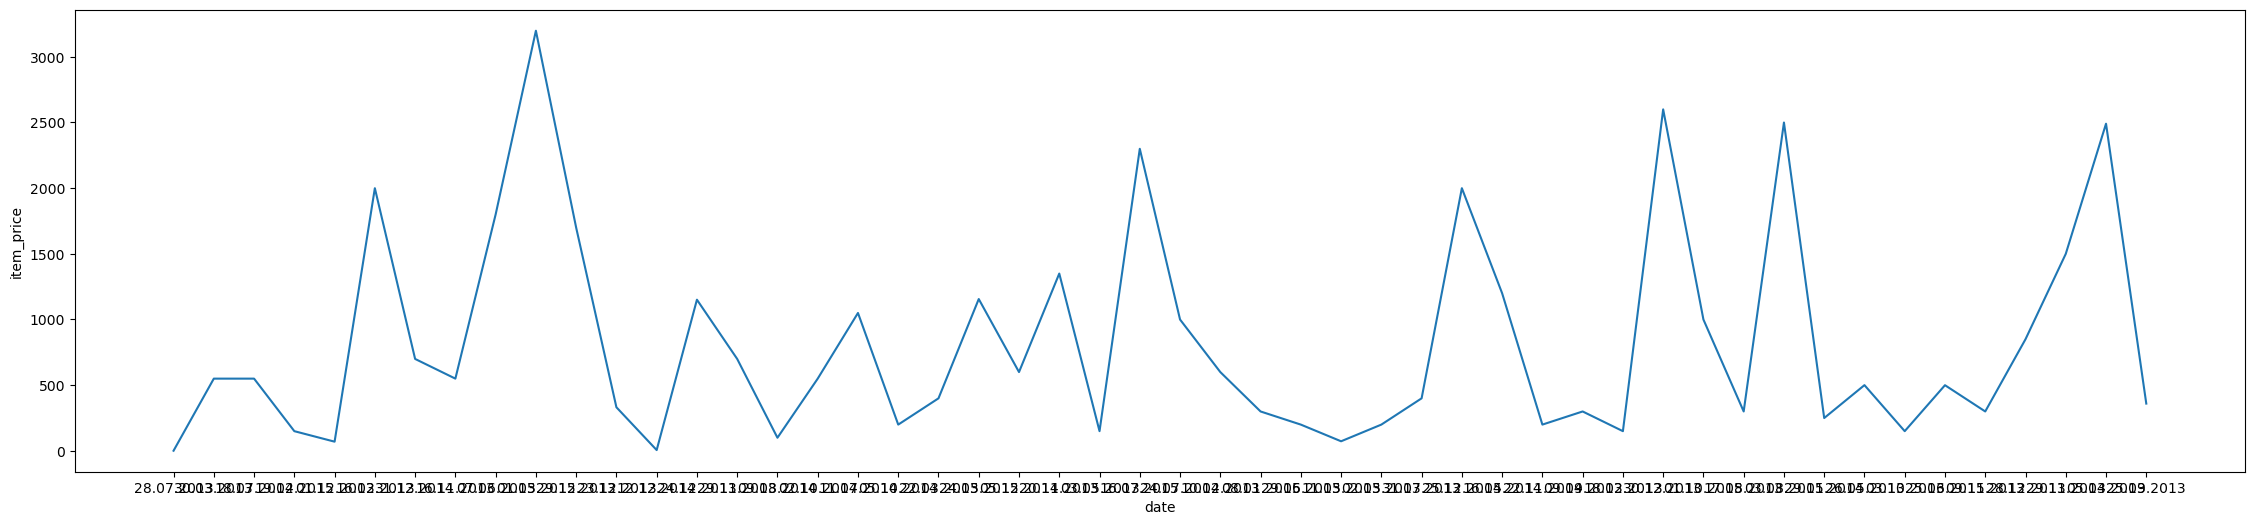

In [12]:
plt.subplots(figsize=(28,6))
g = sns.lineplot(x="date", y="item_price", data=df2)
plt.show()

##### Problème

Une anomalie importante apparait au niveau de la date.\
Premièrement, c'est bizarre de voir autant de dates afficher, alors qu'en toute logique on devrait en voir quelques unes seulement qui laisserait déduire l'ordre chronologique.\
Secondement, on voit que la dernière date est "2013". On sait que notre dataset comporte des dates de 2014 et 2015 (voir le df2.head() au-dessus) donc dans le cas d'un ordre chronologique on devrait pas voir cette date en dernier.

Voyons donc ce que contient cette colonne date.

In [19]:
df2.iloc[0].date, type(df2.iloc[0].date)

('28.07.2013', str)

Finalement, on voit que les dates sont prises en compte en tant que chaîne de caractères. Le graphique associe donc chaque prix à chacune des chaînes de caractères alors qu'il devrait faire un range sur les dates et classer les prix par rapport à cet axe.

Il faut donc convertir les valeurs de la colonne date en type datetime pour que pandas et seaborn puissent mieux utiliser cette donnée.

In [24]:
# On donne en paramètre le format de date de la chaîne de caractère à convertir en datetime
df2.date = pd.to_datetime(df2.date, format="%d.%m.%Y")

In [25]:
df2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
651114,2013-07-28,6,35,11867,0.1,2.0
329095,2013-03-30,2,25,16452,549.0,-1.0
1791935,2014-07-18,18,37,11922,549.0,1.0
2430882,2015-02-19,25,57,8664,149.0,1.0
1227812,2013-12-01,11,57,8829,69.0,1.0


In [22]:
# On vérifie que le changement a bien été pris en compte
df2.iloc[0].date, type(df2.iloc[0].date)

(Timestamp('2013-07-28 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

#### Visualisation de ces données corrigées

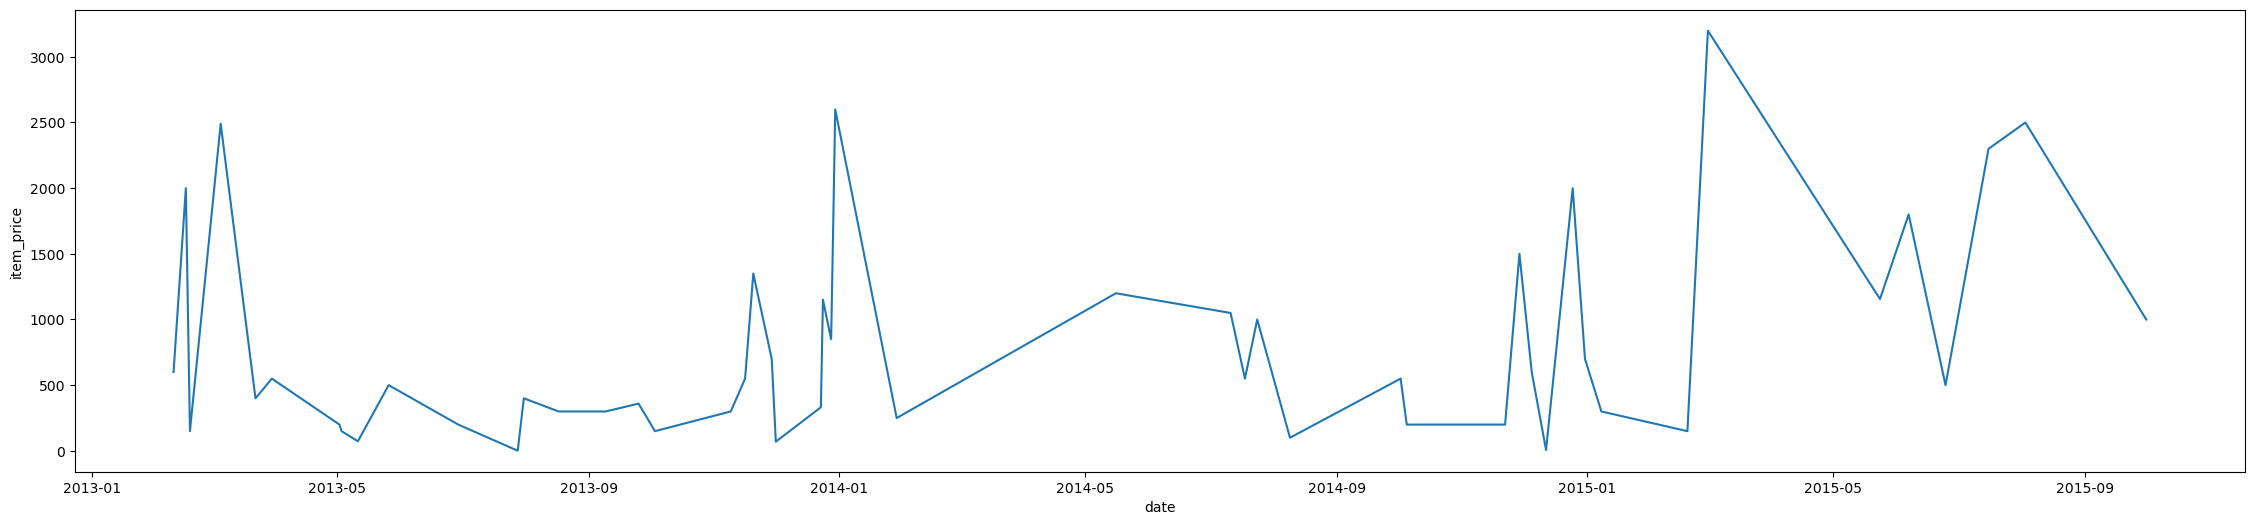

In [23]:
""" Ancienne version """
#g = sns.relplot(x="date", y="item_price", data=df2, kind="line")
#g.ax.set_xticks(g.ax.get_xticks()[::3])
#plt.show()

""" Nouvelle version """
#_,ax et ax=ax sont optionnels (voir le graphique précédent)
_, ax = plt.subplots(figsize=(28,6))
g = sns.lineplot(x="date", y="item_price", data=df2, ax=ax)
plt.show()

L'évolution chronologique du prix est désormais beaucoup plus visible. On ne peut cependant pas conclure grand chose sur l'évolution de cette __variable continue__, il faudrait agrandir la taille de l'échantillon pour voir une évolution plus précise.

In [8]:
help(pd.DataFrame.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'NDFrameT', n: 'int | None' = None, frac: 'float | None' = None, replace: 'bool_t' = False, weights=None, random_state: 'RandomState | None' = None, axis: 'Axis | None' = None, ignore_index: 'bool_t' = False) -> 'NDFrameT'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled 